# Jamie Vardy vs Sergio Aguero

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Arc
import numpy as np
import pandas as pd
import json
from PIL import Image
import requests
from io import BytesIO

In [45]:
def createpitch():
    #Create figure
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    mpl.rcParams['xtick.color'] = "w"
    mpl.rcParams['ytick.color'] = "w"
    mpl.rcParams['xtick.labelsize'] = 10
    mpl.rcParams['ytick.labelsize'] = 10
    fig.set_facecolor("#313332")
    ax.patch.set_alpha(0)

    #Pitch Outline & Centre Line
    plt.plot([0,0],[0,80], color="w")
    plt.plot([0,120],[80,80], color="w")
    plt.plot([120,120],[80,0], color="w")
    plt.plot([120,0],[0,0], color="w")
    plt.plot([120/2,120/2],[0,80], color="w")
            
    #Left Penalty Area
    plt.plot([18 ,18],[(80/2 +18),(80/2-18)],color="w")
    plt.plot([0,18],[(80/2 +18),(80/2 +18)],color="w")
    plt.plot([18,0],[(80/2 -18),(80/2 -18)],color="w")
            
    #Right Penalty Area
    plt.plot([(120-18),120],[(80/2 +18),(80/2 +18)],color="w")
    plt.plot([(120-18), (120-18)],[(80/2 +18),(80/2-18)],color="w")
    plt.plot([(120-18),120],[(80/2 -18),(80/2 -18)],color="w")
            
    #Left 6-yard Box
    plt.plot([0,6],[(80/2+7.32/2+6),(80/2+7.32/2+6)],color="w")
    plt.plot([6,6],[(80/2+7.32/2+6),(80/2-7.32/2-6)],color="w")
    plt.plot([6,0],[(80/2-7.32/2-6),(80/2-7.32/2-6)],color="w")
            
    #Right 6-yard Box
    plt.plot([120,120-6],[(80/2+7.32/2+6),(80/2+7.32/2+6)],color="w")
    plt.plot([120-6,120-6],[(80/2+7.32/2+6),80/2-7.32/2-6],color="w")
    plt.plot([120-6,120],[(80/2-7.32/2-6),80/2-7.32/2-6],color="w")
            
    #Prepare Circles; 10 yards distance. penalty on 12 yards
    centreCircle = plt.Circle((120/2,80/2),10,color="w",fill=False)
    centreSpot = plt.Circle((120/2,80/2),0.8,color="w")
    leftPenSpot = plt.Circle((12,80/2),0.8,color="w")
    rightPenSpot = plt.Circle((120-12,80/2),0.8,color="w")
            
    #Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)
            
    #Prepare Arcs
    leftArc = Arc((11,80/2),height=20,width=20,angle=0,theta1=312,theta2=48,color="w")
    rightArc = Arc((120-11,80/2),height=20,width=20,angle=0,theta1=130,theta2=230,color="w")
            
    #Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)
    
    plt.axis('on')
    fig.set_size_inches(10, 7)

    return(fig,ax)

In [3]:
#Loading the data
ff = open("C:\\Users\\Vandana\\Documents\\Data Science\\Football Analysis\\Statsbomb\\data\\matches\\2\\27.json")
matches = json.load(ff)

In [4]:
#Only Manchester City Games:
for match in matches:
    home_team_name = match['home_team']['home_team_name']
    away_team_name = match['away_team']['away_team_name']
    if (home_team_name == "Manchester City" or away_team_name == "Manchester City"):
        home_score = match['home_score']
        away_score = match['away_score']
        print("Match between {} and {} finished {}-{}".format(home_team_name,away_team_name,home_score,away_score))

Match between Leicester City and Manchester City finished 0-0
Match between Stoke City and Manchester City finished 2-0
Match between Manchester United and Manchester City finished 0-0
Match between Manchester City and Southampton finished 3-1
Match between Manchester City and Newcastle United finished 6-1
Match between Manchester City and West Ham United finished 1-2
Match between Manchester City and Sunderland finished 4-1
Match between Manchester City and Norwich City finished 2-1
Match between West Bromwich Albion and Manchester City finished 0-3
Match between Manchester City and AFC Bournemouth finished 5-1
Match between Tottenham Hotspur and Manchester City finished 4-1
Match between Manchester City and Liverpool finished 1-4
Match between Everton and Manchester City finished 0-2
Match between Crystal Palace and Manchester City finished 0-1
Match between Manchester City and Watford finished 2-0
Match between Arsenal and Manchester City finished 2-1
Match between Manchester City a

In [5]:
#Only Leicester City Games:
for match in matches:
    home_team_name = match['home_team']['home_team_name']
    away_team_name = match['away_team']['away_team_name']
    if (home_team_name == "Leicester City" or away_team_name == "Leicester City"):
        home_score = match['home_score']
        away_score = match['away_score']
        print("Match between {} and {} finished {}-{}".format(home_team_name,away_team_name,home_score,away_score))

Match between Leicester City and AFC Bournemouth finished 0-0
Match between Leicester City and Manchester City finished 0-0
Match between Leicester City and Norwich City finished 1-0
Match between Stoke City and Leicester City finished 2-2
Match between West Bromwich Albion and Leicester City finished 2-3
Match between AFC Bournemouth and Leicester City finished 1-1
Match between Swansea City and Leicester City finished 0-3
Match between Leicester City and Aston Villa finished 3-2
Match between Leicester City and Arsenal finished 2-5
Match between Leicester City and Manchester United finished 1-1
Match between Everton and Leicester City finished 2-3
Match between Newcastle United and Leicester City finished 0-3
Match between Leicester City and Sunderland finished 4-2
Match between Leicester City and Crystal Palace finished 1-0
Match between Norwich City and Leicester City finished 1-2
Match between Southampton and Leicester City finished 2-2
Match between Leicester City and Chelsea fin

In [6]:
team1 = "Manchester City"

MCI = []

for match in matches:
    home_team_name = match['home_team']['home_team_name']
    away_team_name = match['away_team']['away_team_name']
    if ((home_team_name == team1) or (away_team_name == team1)):
        match_id_req = match['match_id']
        MCI.append(match_id_req)

In [7]:
team2 = "Leicester City"

LEI = []

for match in matches:
    home_team_name = match['home_team']['home_team_name']
    away_team_name = match['away_team']['away_team_name']
    if ((home_team_name == team2) or (away_team_name == team2)):
        match_id_req = match['match_id']
        LEI.append(match_id_req)

Text(0.54, 0.9, 'Sergio Aguero')

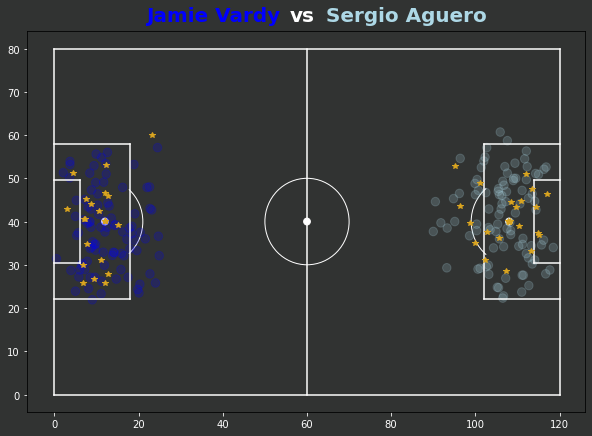

In [49]:
(fig,ax) = createpitch()

for ic,match_id in enumerate(MCI):
    MCIdata = "C:\\Users\\Vandana\\Documents\\Data Science\\Football Analysis\\Statsbomb\\data\\events\\"+str(match_id)+".json"
    ManC = json.load(open(MCIdata,encoding = 'utf-8'))
    
    df = pd.json_normalize(ManC, sep = "_").assign(match_id = (str(match_id)+'.json'))
    team_actions = (df['team_name']=='Manchester City')
    df = df[team_actions]
    
    ManC_shots = df.loc[df['type_name'] == 'Shot'].set_index('id')
    for i,A_shots in ManC_shots.iterrows():
        x = A_shots['location'][0]
        y = A_shots['location'][1]
        
        if (A_shots['player_name'] == "Sergio Leonel Agüero del Castillo"):
            if (A_shots['shot_outcome_name'] == 'Goal'):
                plt.plot(x,80-y,color="goldenrod",marker="*")
            else:
                shotCircle=plt.Circle((x,80-y),1,color="lightblue")     
                shotCircle.set_alpha(.2)
                ax.add_patch(shotCircle)
                
for ic,match_id in enumerate(LEI):
    LEIdata = "C:\\Users\\Vandana\\Documents\\Data Science\\Football Analysis\\Statsbomb\\data\\events\\"+str(match_id)+".json"
    LeiC = json.load(open(LEIdata,encoding = 'utf-8'))
    
    df = pd.json_normalize(LeiC, sep = "_").assign(match_id = (str(match_id)+'.json'))
    team_actions = (df['team_name']=='Leicester City')
    df = df[team_actions]
    
    LeiC_shots = df.loc[df['type_name'] == 'Shot'].set_index('id')
    for i,J_shots in LeiC_shots.iterrows():
        x = J_shots['location'][0]
        y = J_shots['location'][1]
        
        if (J_shots['player_name'] == "Jamie Vardy"):
            if (J_shots['shot_outcome_name'] == 'Goal'):
                plt.plot(120-x,y,color="goldenrod",marker="*")
            else:
                shotCircle=plt.Circle((120-x,y),1,color="blue")     
                shotCircle.set_alpha(.2)
                ax.add_patch(shotCircle)
                
fig.text(0.29,0.90,"Jamie Vardy", color="b", fontsize=20, fontweight='bold')
fig.text(0.49,0.90,"vs", color="w", fontsize=20, fontweight='bold')
fig.text(0.54,0.90,"Sergio Aguero", color="lightblue", fontsize=20, fontweight='bold')